In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df=pd.read_csv('bigdatamart_train.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#checking for categorical attributes
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [10]:
df=df.fillna(method='ffill')

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
sum(df['Item_Visibility']==0)

526

In [13]:
# replace zeros in Item_Visibility column with mean
df.loc[:,'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [14]:
sum(df['Item_Visibility']==0)

0

In [15]:
#combining item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#create small values for establishment year
df['Outlet_Year'] = 2013-df['Outlet_Establishment_Year']

In [17]:
df['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

# EDA

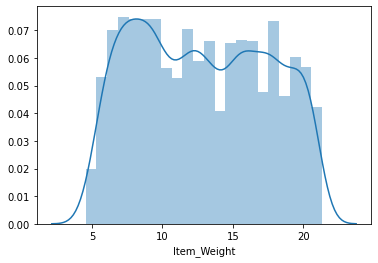

In [18]:
import seaborn as sns
sns.distplot(df['Item_Weight'])

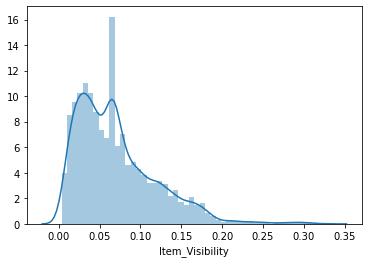

In [19]:
sns.distplot(df['Item_Visibility'])

In [20]:
#log transformation
df['Item_Visibility'] = np.log(1+df['Item_Visibility'])

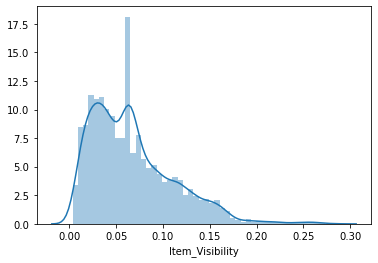

In [21]:
sns.distplot(df['Item_Visibility'])

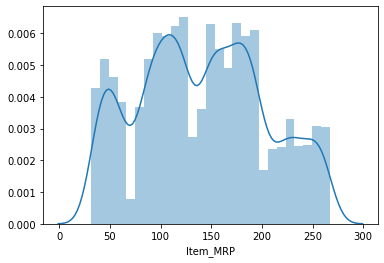

In [22]:
sns.distplot(df['Item_MRP'])

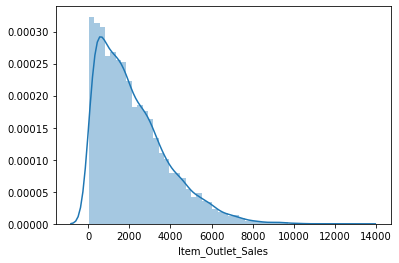

In [23]:
sns.distplot(df['Item_Outlet_Sales'])

In [24]:
#log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

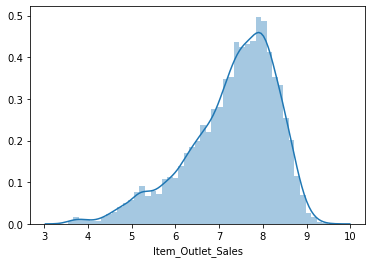

In [25]:
sns.distplot(df['Item_Outlet_Sales'])

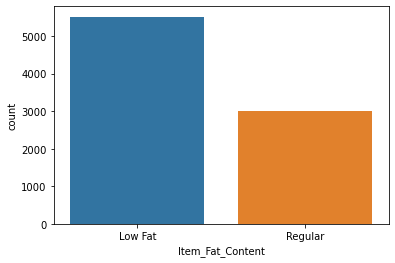

In [26]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

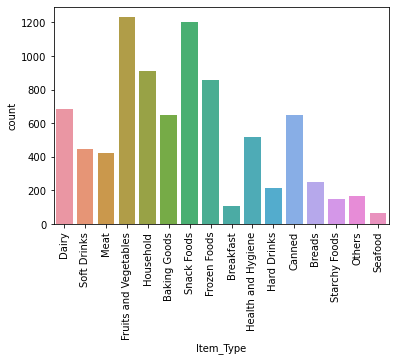

In [27]:
#plt.figure(figsize=(20,5))
l =list(df['Item_Type'].unique())
chart=sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)

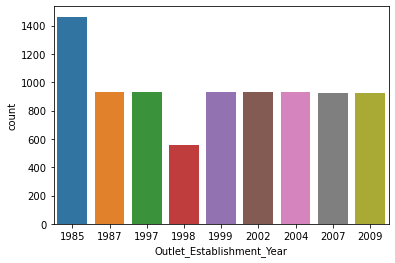

In [28]:
sns.countplot(df['Outlet_Establishment_Year'])

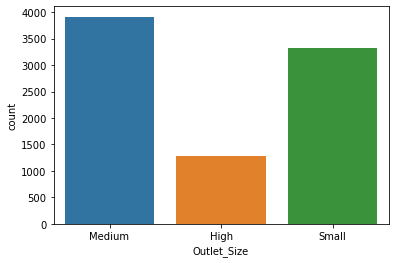

In [29]:
sns.countplot(df['Outlet_Size'])

In [30]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year
Item_Weight,1.000000,-0.016207,0.020279,-0.004928,0.012915,0.004928
Item_Visibility,-0.016207,1.000000,-0.004858,-0.076053,-0.198589,0.076053
Item_MRP,0.020279,-0.004858,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.004928,-0.076053,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.012915,-0.198589,0.509886,0.077032,1.000000,-0.077032
Outlet_Year,0.004928,0.076053,-0.005020,-1.000000,-0.077032,1.000000


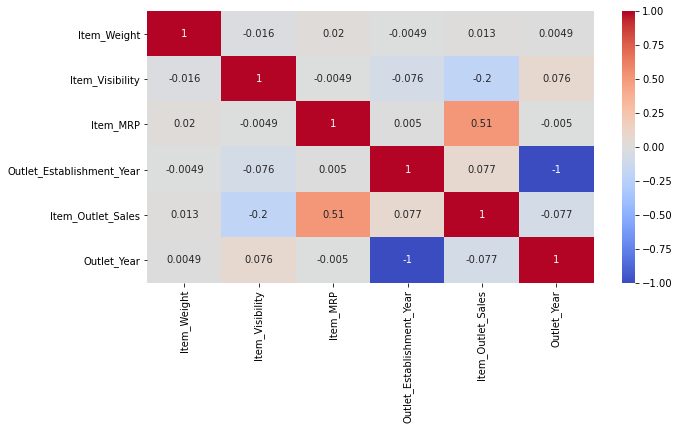

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Label Encoding

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,14
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,4
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,14
3,FDX07,19.20,Regular,0.064037,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,15
4,NCD19,8.93,Low Fat,0.064037,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,26


In [33]:
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
0,156,9.300,0,0.015920,4,249.8092,9,1999,1,0,1,8.225808,14,9
1,8,5.920,1,0.019095,14,48.2692,3,2009,1,2,2,6.096776,4,3
2,662,17.500,0,0.016621,10,141.6180,9,1999,1,0,1,7.648868,14,9
3,1121,19.200,1,0.064037,6,182.0950,0,1998,1,2,0,6.597664,15,0
4,1297,8.930,0,0.064037,9,53.8614,1,1987,0,2,1,6.903451,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.055230,13,214.5218,1,1987,0,2,1,7.929984,26,1
8519,897,8.380,1,0.045912,0,108.1570,7,2002,0,1,1,6.310436,11,7
8520,1357,10.600,0,0.034581,8,85.1224,6,2004,2,1,1,7.085159,9,6
8521,681,7.210,1,0.135597,13,103.1332,3,2009,1,2,2,7.521100,4,3


# train test split

In [35]:
x=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [36]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8523, 14)

In [37]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  174,  178,  255,  405,  430,  434,  446,  489,
        502,  521,  532,  540,  574,  828,  854,  906,  920, 1159, 1272,
       1291, 1311, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651,
       1805, 1827, 1841, 1913, 2055, 2088, 2122, 2251, 2324, 2324, 2337,
       2394, 2439, 2445, 2571, 2586, 2613, 2728, 2855, 2895, 3017, 3053,
       3163, 3206, 3247, 3283, 3301, 3399, 3408, 3458, 3474, 3488, 3497,
       3540, 3702, 3750, 3767, 3884, 3940, 3993, 4006, 4219, 4219, 4265,
       4280, 4297, 4350, 4382, 4408, 4530, 4656, 4674, 4705, 4717, 4789,
       4925, 4941, 5031, 5150, 5192, 5287, 5368, 5374, 5374, 5397, 5427,
       5573, 5624, 5670, 5693, 5732, 5734, 5795, 5837, 5880, 5891, 5946,
       5946, 5948, 6008, 6012, 6139, 6179, 6536, 6576, 6622, 6644, 6658,
       6674, 6786, 6869, 6871, 6903, 6950, 7005, 7088, 7107, 7121, 7215,
       7250, 7278, 7388, 7388, 7499, 7558, 7585, 7603, 7612, 7632, 7744,
       7807, 7835, 7861, 7866, 7949, 8110, 8194, 8

In [38]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8523, 14)
(8372, 14)


# model training

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred = model.predict(x)
    
    #perform cross-validation
    cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('model report')
    print('MSE:', mean_squared_error(y, pred))
    print('CV score:', cv_score)

model report
MSE: 0.43434330153283507
CV score: 0.43574090834097856


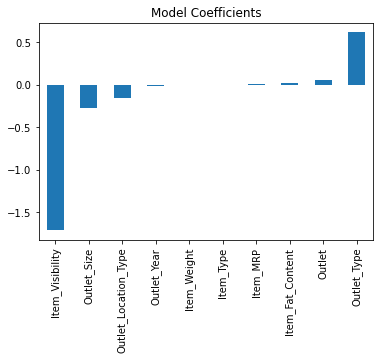

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 0.5787269237673208
CV score: 0.5797200344187194


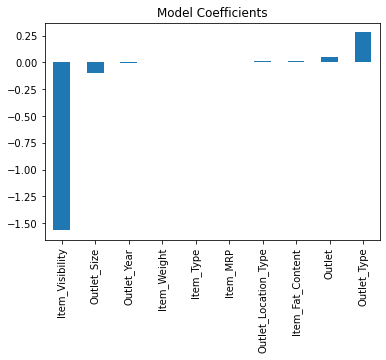

In [41]:
model = Ridge(normalize=True)
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 0.7628688679102086
CV score: 0.7630789166281843


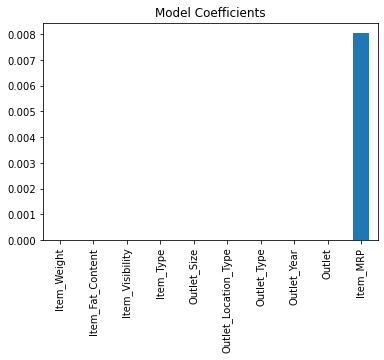

In [42]:
model = Lasso()
train(model,x,y)
coef= pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE: 5.5534030638578795e-34
CV score: 0.5671354690628335


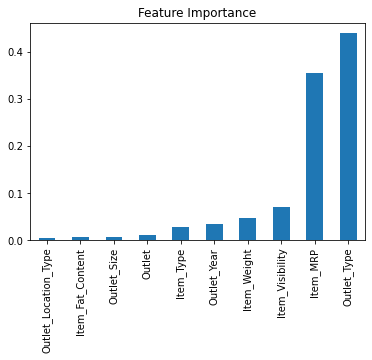

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

model report
MSE: 0.04170546615804669
CV score: 0.3078527758945442


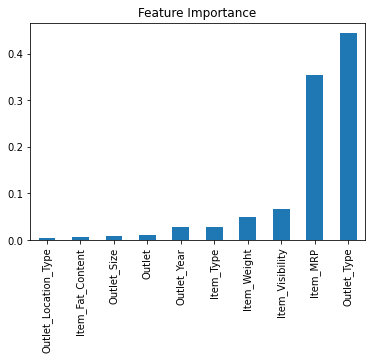

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_, x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)

At random state 62 the model performs well
At random state:- 62
Training r2 score is:- 57.828108825120516
Testing r2 score is:- 57.81467254923892
At random state 68 the model performs well
At random state:- 68
Training r2 score is:- 57.83268701832218
Testing r2 score is:- 57.82387871806718
At random state 89 the model performs well
At random state:- 89
Training r2 score is:- 57.8040165343634
Testing r2 score is:- 57.84678570723097
At random state 106 the model performs well
At random state:- 106
Training r2 score is:- 57.833523662481355
Testing r2 score is:- 57.80338708102091
At random state 139 the model performs well
At random state:- 139
Training r2 score is:- 57.844949173726064
Testing r2 score is:- 57.8152748248869


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=139)

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()

In [48]:
print(r2score*100)

64.95735131116271


In [49]:
import joblib
joblib.dump(RF,"Project18.pkl")

['Project18.pkl']

In [50]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,6.603096,7.027409
1,6.629824,6.497407
2,5.441122,5.531323
3,7.316576,7.908944
4,7.628999,8.328039
5,8.161976,7.582018
6,8.444826,8.757758
7,6.713276,6.463652
8,7.931660,6.865795
9,7.232156,6.970840
